# Early OTE Commissioning Guiding PSF Analysis

During the five non-deployment OTE-CARs that precede LOS-02, the WF Guiding team will do periodic checks of the PSFs and determine if there are any concerns for guiding in LOS-02. This notebook will walk through image analysis of images from OTE-01, OTE-02, OTE-03, OTE-04, and OTE-06. We do not expect analysis of OTE-05 to be necessary. We focus on PSF shapes and how many "guideable" segment PSFs we have at each stage. 

It is important to note that this notebook will do very similar analysis for all CARs, with some small adjustments for OTE-03 and OTE-04 because of the type of data we will get. A lot of the data is presented without drawing conclusions, it will be up to you to do so. In some cases you might find the there is more information than you think is helpful, it is up to you to determine what is helpful and what is not. 

As each step is completed, as needed, please communicate a summary of what you have found to WF Ops via email or over the loops during a non-busy time in commissioning. 

*It is very important to provide WF Ops with an update if you think the number of "guidable" segment PSFs is less than 6 prior to OTE-03.*

### To save a plot

If you want to save any plots to be printed or just viewed in Preview or another window, right click on the plots you want to save and then choose "Save image as..."

# Table of Contents
1. [Overview of products from Shadow](#Overview-of-the-products-we-can-expect-from-Shadow-and-others)
2. [Overview of each CAR](#Overview-of-each-CAR) 
3. [After OTE-01](#After-OTE-01)
4. [After OTE-02](#After-OTE-02)
5. [After OTE-03](#After-OTE-03)
6. [After OTE-04](#After-OTE-04)
7. [After OTE-06](#After-OTE-06)

The following sections are support sections and may not be run

8. [Examine all OTE-03 Data](#Look-at-different-focus-positions-in-OTE-03-data)
9. [Grab Large Image Array PSF Locations](#Get-simulated-NIRCam-locations-of-LOS-02-PSFs)


In [1]:
import os
from glob import glob

from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd

import notebook_utils
from notebook_utils import GA_PSF_LOCATIONS

font = {'size' : 16}
matplotlib.rc('font', **font)

%matplotlib inline

Using backend:  Qt5Agg
Your MAGIC package is up to date
Your FGS COUNTRATE package is up to date


# Overview of the products we can expect from Shadow and others 

### What you will expect to have from WSS Shadow
1. Path to the mosaic to knowledge about which file(s) to look for if they are coming via DANs
2. (Optional) A general idea of the location of the target star in the mosaic image
3. When segment information is known, a location where we can find the printout/electronic copy of which segment is which

# Overview of each CAR

## OTE-01: Initial Image Mosiac

OTE-01 is the initial image mosaic and its goal is to find the 18 segments. 

There will be a range of focus for the PSFs; some will be close to focus, some will be out of focus. This will cause several of the segment PSFs to be saturated because, by requirement, the target star should be very bright and isolated. If a PSF is not saturated, it likely has a large defocus. The closer to focus, the more saturation will expected. 

After finding the segments, we define an initial offset of each segment PSF from the target location, which given by a rough estimate of the center of the PMSA deployment. If the target PSFs are too bright, we can inspect the shape of the PSFs by looking at the fainter background stars, however this notebook is not currently set up for that path since the simulated images that we have do not have such an option.

For OTE-01, we will have some idea of the shape of the segment PSFs but no idea of any of the segments' identifications. 

**Note: WSS Shadow downsamples the detector images for the mosaic** but we do have the normal DMS images, so Shadow can give you the name of the DMS file that has the segments for a not downsampled option. If that is the case, look at the [OTE-03](#After-OTE-03) or [OTE-04](#After-OTE-04) sections to know how to combine the detector images to make our own mosaic.

#### Shadow will provide:
 - End of OTE-01 mosaic path (will be available in the `/data/...` directory in SOGS)

[Go to OTE-01 analysis section](#After-OTE-01)

## OTE-02: Alignment Matrix 1

WSS/WSS Shadow will use the OTE-01 initial mosaic offset from the expected target to do the first telescope correction for OTE-02, so that it points roughy to the center of the initial deployment. 

For OTE-02 we have NIRCam ALL images, so we should have a partial view of the initial deployment (not mosaic) but these should have few, if any, saturated PSFs. Saturation in any of the PSFs will imply that the defocus is too large between all segments. 

The process for OTE-01 and OTE-02  for WF Guiding will be the same. Both OTE-01 and OTE-02 images are expected to have high backgrounds.

*It is very important to provide WF Ops with an update if you think the number of "guidable" segment PSFs is less than 6 prior to OTE-03.*

#### Shadow will provide:
 - End of OTE-02 mosaic path - if no mosaic is provided use the code shown in section [OTE-03](#After-OTE-03) to make your own
 - Any information from any discussions regarding PSF quality dicussed in the WF office **if time allows**

[Go to OTE-02 analysis section](#After-OTE-02)

## OTE-03: Secondary Mirror Focus Sweep 

**0TE-03 is optional, but likely to occur.** 

During OTE-03, the secondary mirror will be moved 100um in either direction in order to find the best focus for the segment PSFs that are visible in the field.

We will have the NRCALL exposures, as with OTE-02, with as many segments in the field as possible. At the end of OTE-03 we might have a tentative segment ID (though we will not consider this in our analysis) and should have better (or more compact) PSFs for guiding.

WF Guiding should have recieved a DAN regarding any OTE-03 data.

#### Shadow will provide:
 - Any idea regarding which segment PSF is which. There will be a formal list somewhere, in a PNG (will be avilable on a pring out or in `/data/…`)

[Go to OTE-03 analysis section](#After-OTE-03)

## OTE-04: Segment ID

At the end of OTE-04 we should have the ID of each segment, with images of all the segment PSFs. The only caveat is that some segments may be on top or close to each other, thus, some contamination could affect the PSF measurements.

As this point, WF Guiding should be able to make a fake large image array image that can be run through MAGIC and DHAS. All successful guide/reference star configurations, should be recorded.

#### Shadow will provide:
 - Which segment is which in either an OTE-04 image printout or online. Format and communication is unclear (will be avilable on a print out or in `/data/…`)


[Go to OTE-04 analysis section](#After-OTE-04)

## OTE-05: Alignment Matrix 2

OTE-05 is similar to OTE-02.

We do not expect to have any new information from OTE-05 that can help WF Guiding prepare for LOS-02, so no analysis will be done. 

## OTE-06: Segment Image Array 1

During OTE-06, WSS forms the large array in NIRCam A3. At the end of OTE-06 we'll have the same configuration and PSF as in LOS-02 and the first exposure of OTE-07. This is also a good time to do a full PSF characterization in preparation for Guiding.

#### Shadow will provide:
- Nothing


[Go to OTE-06 analysis section](#After-OTE-06)

# After OTE 01 

<font color='Tomato'> <div><center>  
## Make sure the following parameters are correct
</center></div></font>

In [2]:
# CAR information
car = 'OTE-01' # Make sure this form matches how it is written in the path to the data
program_id = 1134

In [3]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/' #/data/jwst/wss/flight/

# Path to the OTE-01 mosaic
ote01_mosaic = os.path.join(main_directory, f'{car}/mosaic0_obs1-2_median_sub_gbrady_05032021.fits')

# The original mosaic will be resampled, see if shadow can give you the new pixelscale
ote01_pixelscale = None # If set to None, the NIRCam SW pixelscale of 0.031"/pixel will be used

# Define location of the target in the image
# If no location is provided, set variable equal to None and the code will take the median of the PSF locations
ote01_target_location = None 

<font color='DodgerBlue'> <div><center>  
## Run the following cells without changing them   
</center></div></font>

In [4]:
# We use the header for getting the pixel scale so it's okay that it is for only one of the images
ote01_image, ote01_header = fits.getdata(ote01_mosaic, header=True)

# Create a PsfAnalysis object for OTE-02, this is how we can do most of the analysis
ote01 = notebook_utils.PsfAnalysis(car, ote01_image, ote01_header, ote01_pixelscale, ote01_target_location)

In [5]:
# Measure the PSF locations and their characteristics for the OTE-01 mosaic
# Adjust the psf_window_radius if the window around the cut out PSFs below as needed
# This function will measure the FWHM_x, FWHM_y, the distance to the target location, 
#  and the encircled energy for each PSF
ote01.get_image_information(smoothing='high', psf_window_radius=40)

18 PSFs found


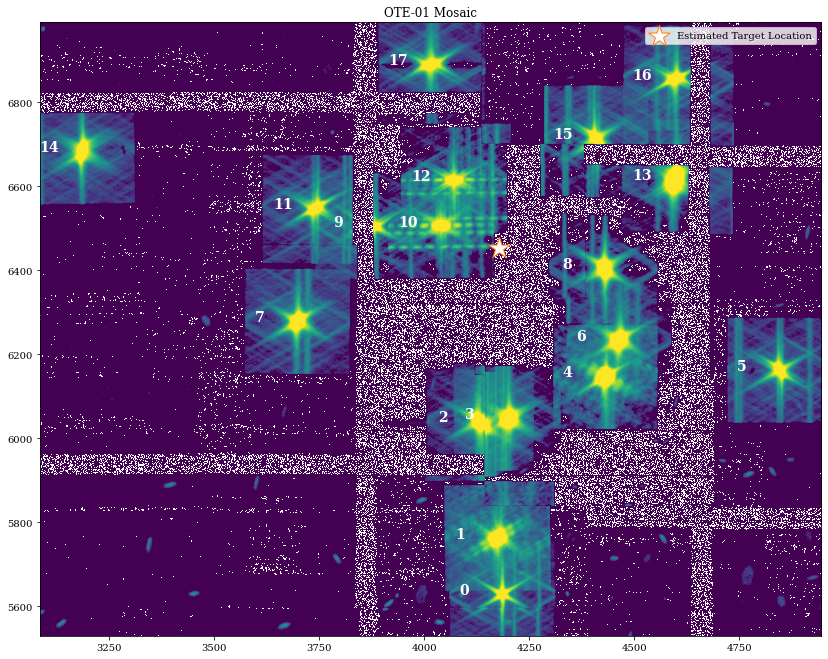

In [6]:
# Plot the full mosaic with the estimated target location and identified PSFs
ote01.plot_image_with_psfs(xlim=None, # If you need to change the x axis limits, do so here
                           ylim=None, # If you need to change the y axis limits, do so here
                           label_color='white') # If you can't read the PSF labels, change this parameter

<font color='SlateBlue'> <div>

### Things to look for:    
 
</div></font>


- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single bright spot in the PSF or are there multiple knots/lobes?


In [7]:
# Cut out each segment and do a visual check
ote01.plot_each_identified_segment_psf(num_psf_per_row=4,
                                       labels=None) # Change this if you have segment knowledge

Cannot plot anything without the PSFs list being populated.


IMPORTANT NOTE: Any PSFs that have saturated cores may not have reliable FWHM or EE measurements

In [8]:
# Let's look at the measured properties of each PSF
# The index on the left is the same as the numbering in the plots above
ote01.info_df

x     y        fwhm_x        fwhm_y  distance_to_target
0   4184  5630  2.768078e-38  2.768078e-38          824.021844
1   4173  5763  2.370581e+01  1.569418e+01          691.018089
2   4133  6040  2.156767e+01  1.397035e+01          416.438471
3   4197  6047  1.684799e+01  2.184179e+01          407.443248
4   4429  6147  1.967618e+01  2.344807e+01          396.547601
5   4844  6162  9.435524e+00  2.082085e+01          727.200110
6   4462  6234  1.665781e+01  2.363094e+01          359.243650
7   3697  6278  1.166673e+01  1.938560e+01          512.188442
8   4428  6404  1.353502e+01  2.288587e+01          254.950976
9   3884  6504  7.277134e+00  6.139351e+00          298.221394
10  4038  6506  1.566607e+01  8.640271e+00          149.345238
11  3740  6548  6.714490e+00  1.940318e+01          447.973213
12  4069  6614  1.754210e+01  7.733700e+00          193.600103
13  4595  6617  2.127152e+01  3.866191e+01          447.725362
14  3185  6683  2.696310e+01  7.680320e+00         1019.063295
15  4408  6714  1.884985e+01  7.745774e+00          347.131099
16  4596  6856  1.947648e+01  8.187445e+00          579.937928
17  4014  6890  2.135600e+01  7.310792e+00          465.824001

In the table, the x, y location of each PSF has been found, it's associated FWHM_x and FWHM_y have been measured, as well as the distance to the estimated target location.

## Look at FWHM values and distance to the target

In the plots below, a circle is plotted for each located PSF in the mosiac image. The color of the circle is indicated by the value of the parameter indicated in the title. Green indicates a better value, red indicates a worse value, relative to the other data points. 

The distance to target can tell us how much the PSF might change once it is moved to its large image array location

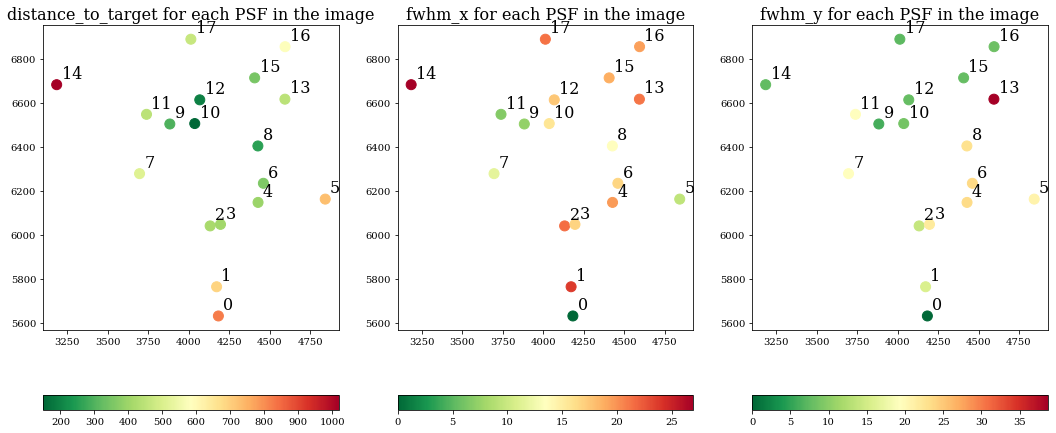

In [9]:
# Look at FWHM x and y (though the images should tell you the same information)
ote01.plot_multiple_parameters(['fwhm_x', 'fwhm_y', 'distance_to_target'])

### If EE has been measured, plot it!

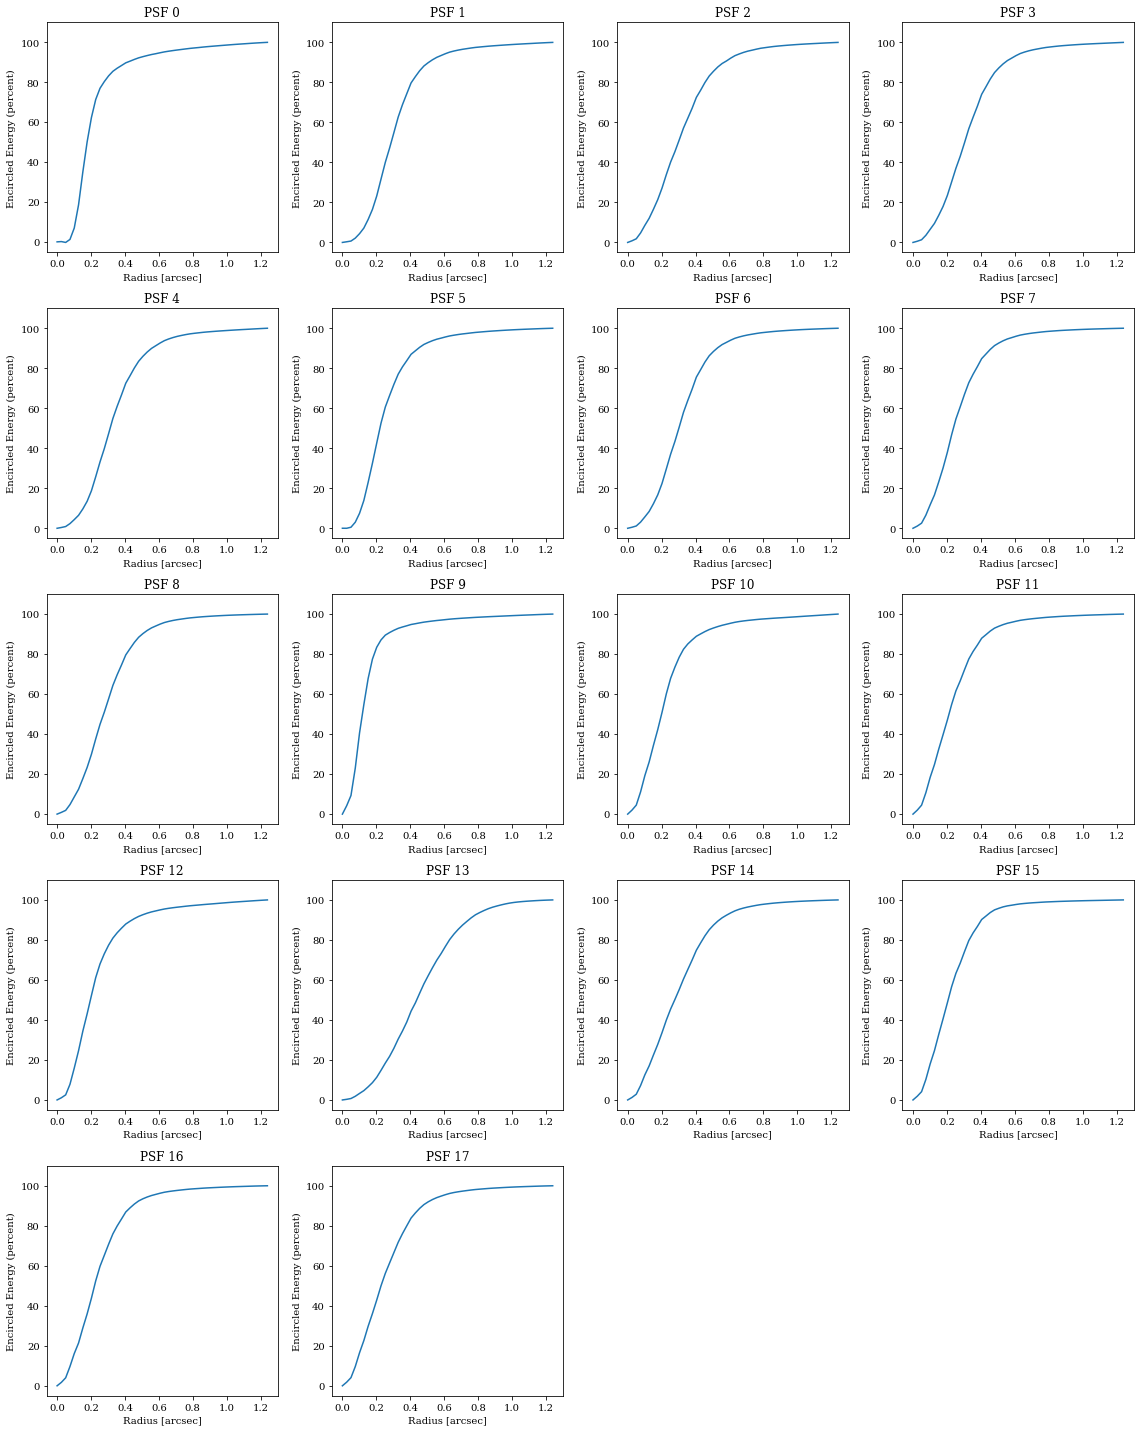

In [10]:
# We will only measure EE if pixel scale is not None
# All plots have the SAME y axis
ote01.plot_ee(num_psf_per_row=4, 
              labels=None) # Change this if you have segment knowledge     

### Based on the above information, how many segment PSFs are good enough to guide one?

<font color='Tomato'> <div><center>    
### Update the next cell (only) as needed   
</center></div></font>

In [11]:
# Give the number of PSFs that you think are good enough to guide on
good = 13 

If the number of "Good" PSFs is more than, or equal to 6, then we can feel confident that we can get a guiding scenario. If it is less than 6, then we will need OTE-03

In [12]:
if good < 6:
    print(f'We only have {good} PSFs that we think are good enough for guiding. We need more than 6.')
else:
    print(f'We have {good} PSFs that we think are good enough for guiding, which might be enough.')

We have 13 PSFs that we think are good enough for guiding, which might be enough.


# After OTE 02

*Do the same analysis that you did after OTE-01, just with the image of the partial deployment*

<font color='Tomato'> <div><center>  
## Make sure the following parameters are correct
</center></div></font>

In [13]:
# CAR information
car = 'OTE-02' # Make sure this form matches how it is written in the path to the data
program_id = 1135

In [14]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/' #/data/jwst/wss/flight/

# Location of the OTE-02 mosaic with most segments
ote02_mosaic = os.path.join(main_directory, f'{car}/output/mosaic0_OTE-02-Obs1+2-SW.fits')

# Pixelscale of the image, replace the None below if the mosaic has been rebinned by shadow
ote02_pixelscale = None # If set to None, the NIRCam SW pixelscale of 0.031"/pixel will be used

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote02_target_location = None

<font color='DodgerBlue'> <div><center>
## Run the following cells without changing them 
</center></div></font>

In [15]:
# We use the header for getting the pixel scale so it's okay that it is for only one of the images
ote02_image, ote02_header = fits.getdata(ote02_mosaic, header=True)

# Create a PsfAnalysis object for OTE-02, this is how we can do most of the analysis
ote02 = notebook_utils.PsfAnalysis(car, ote02_image, ote02_header, ote02_pixelscale, ote02_target_location)

In [16]:
# Measure the PSF locations and their characteristics for the OTE-02 mosaic
# Adjust the psf_window_radius if the window around the cut out PSFs below as needed
# This function will measure the FWHM_x, FWHM_y, the distance to the target location, 
#  and the encircled energy for each PSF
ote02.get_image_information(smoothing='high', psf_window_radius=40)

14 PSFs found


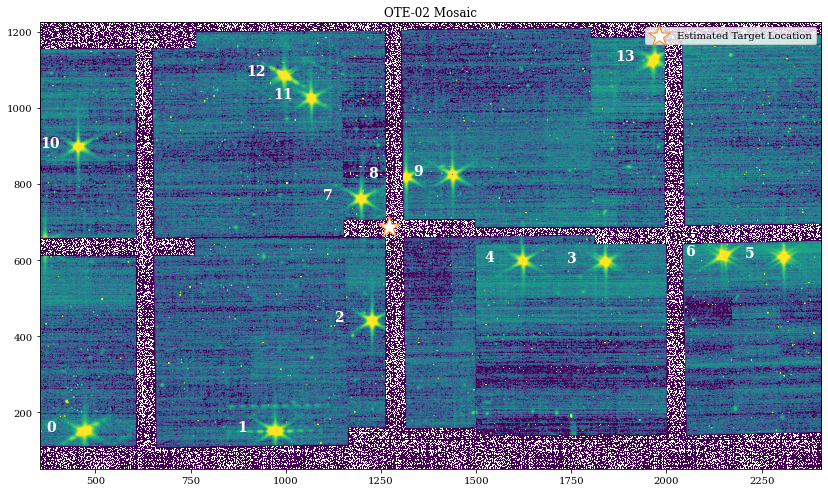

In [17]:
# Plot the full mosaic with the estimated target location and identified PSFs
ote02.plot_image_with_psfs(xlim=None, # If you need to change the x axis limits, do so here
                           ylim=None, # If you need to change the y axis limits, do so here
                           label_color='white') # If you can't read the PSF labels, change this parameter

<font color='SlateBlue'> <div>

### Things to look for:    
 
</div></font>


- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single bright spot in the PSF or are there multiple knots/lobes?


In [18]:
# Cut out each segment and do a visual check
ote02.plot_each_identified_segment_psf(num_psf_per_row=4,
                                       labels=None) # Change this if you have segment knowledge

Cannot plot anything without the PSFs list being populated.


IMPORTANT NOTE: Any PSFs that have saturated cores may not have reliable FWHM or EE measurements

In [19]:
# Let's look at the properties of each PSF. 
# The index on the left is the same as the numbering in the plots above
ote02.info_df

x     y        fwhm_x        fwhm_y  distance_to_target
0    471   152  9.237702e+00  1.384320e+01          962.405840
1    972   152  1.466208e+01  8.751802e+00          612.883349
2   1226   441  2.768078e-38  2.768078e-38          250.081987
3   1838   596  2.768078e-38  2.768078e-38          574.256040
4   1621   598  2.768078e-38  2.768078e-38          361.138478
5   2306   608  9.628872e+00  1.275378e+01         1038.010597
6   2148   613  8.827691e+00  1.091404e+01          880.116470
7   1197   761  9.785717e+00  1.123684e+01          104.651804
8   1316   818  2.768078e-38  2.768078e-38          138.513537
9   1436   824  2.768078e-38  4.858461e-01          214.462118
10   454   898  7.186685e-01  2.768078e-38          843.806850
11  1066  1026  1.403410e+01  9.506498e+00          396.164107
12   995  1085  2.768078e-38  2.768078e-38          484.334595
13  1965  1125  7.751444e+00  1.639224e+01          820.658272

In the table, the x, y location of each PSF has been found, it's associated FWHM_x and FWHM_y have been measured, as well as the distance to the estimated target location.

## Look at FWHM values and distance to the target

In the plots below, a circle is plotted for each located PSF in the mosiac image. The color of the circle is indicated by the value of the parameter indicated in the title. Green indicates a better value, red indicates a worse value, relative to the other data points. 

The distance to target can tell us how much the PSF might change once it is moved to its large image array location

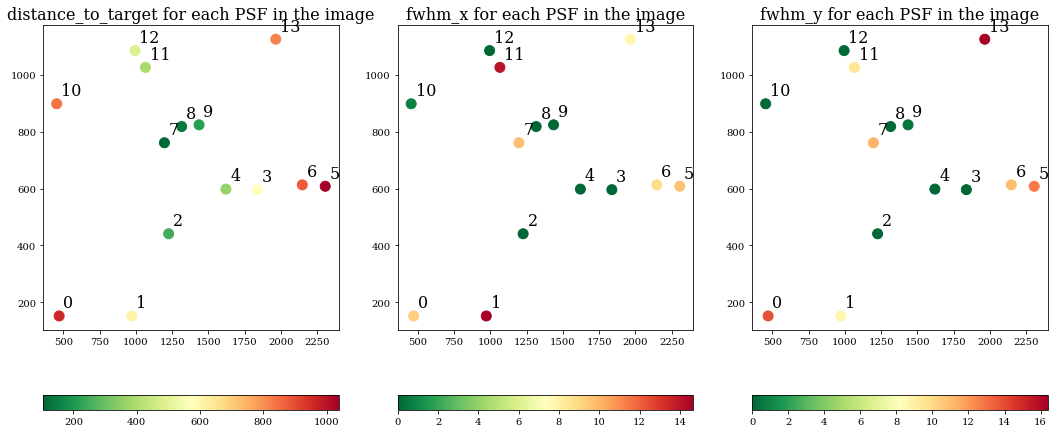

In [20]:
# Look at FWHM x and y (though the images should tell you the same information)
ote02.plot_multiple_parameters(['fwhm_x', 'fwhm_y', 'distance_to_target'])

### If EE has been measured, plot it!

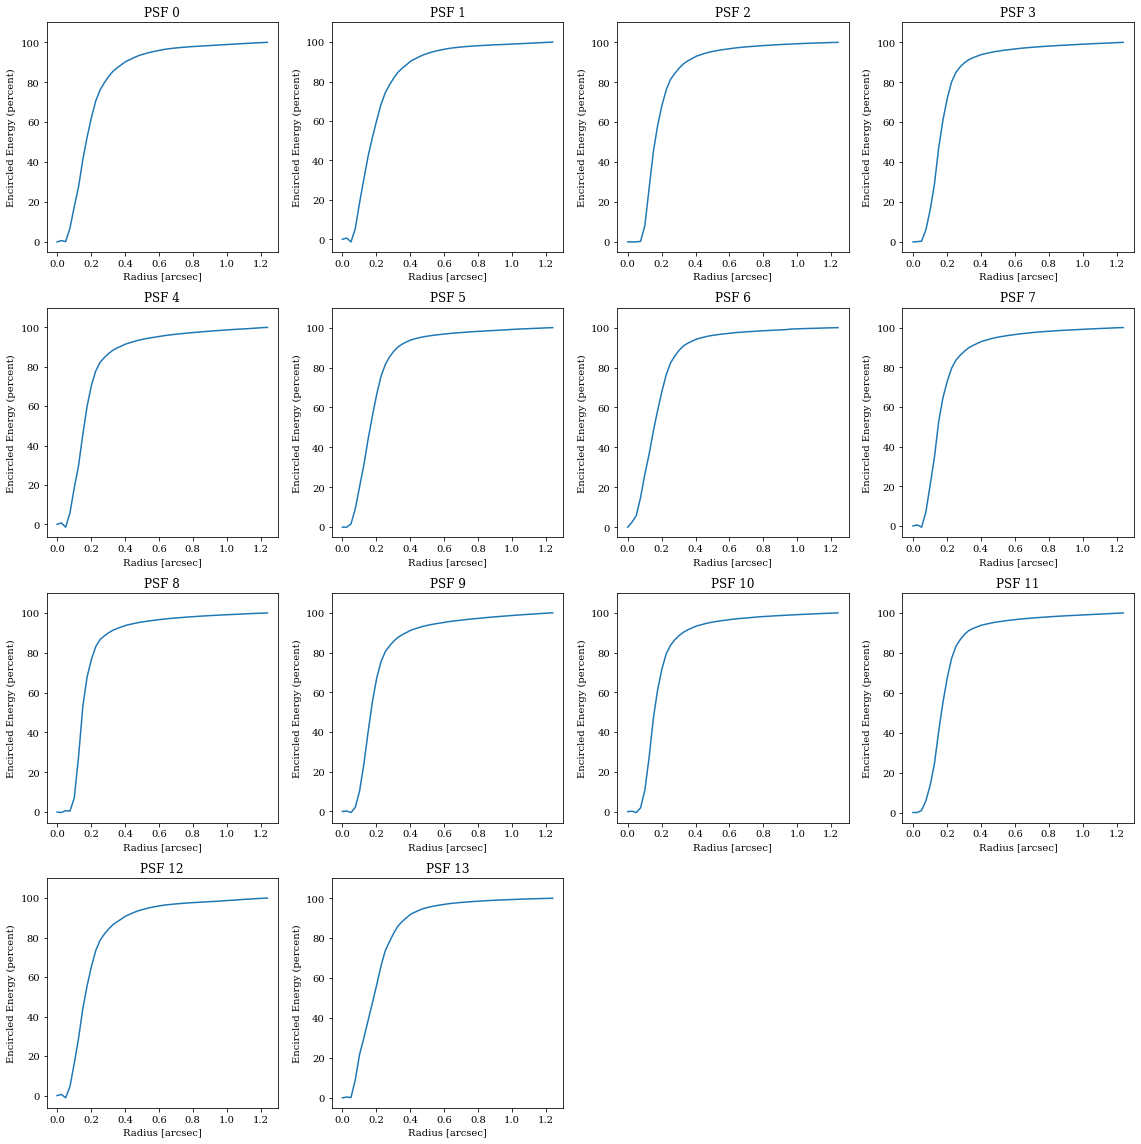

In [21]:
# We will only measure EE if pixel scale is not None
# All plots have the SAME y axis
ote02.plot_ee(num_psf_per_row=4, 
              labels=None) # Change this if you have segment knowledge     

### Based on the above information, how many segment PSFs are good enough to guide one?

<font color='Tomato'> <div><center>    
### Update the next cell (only) as needed   
</center></div></font>

In [22]:
# Give the number of PSFs that you think are good enough to guide on
good = 13 

If the number of "Good" PSFs is more than, or equal to 6, then we can feel confident that we can get a guiding scenario. If it is less than 6, then we will need OTE-03

In [23]:
if good < 6:
    print(f'We only have {good} PSFs that we think are good enough for guiding. We need more than 6.')
else:
    print(f'We have {good} PSFs that we think are good enough for guiding, which might be enough.')

We have 13 PSFs that we think are good enough for guiding, which might be enough.


# After OTE 03

<font color='Tomato'> <div><center>  
## Make sure the following parameters are correct
</center></div></font>

In [24]:
# CAR information
car = 'OTE-03' # Make sure this form matches how it is written in the path to the data
program_id = 1136

In [25]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/' #/data/jwst/wss/guiding/Commissioning/ote03

# Location of the NIRCam images at the best focus
ote03_best_focus_images = glob(os.path.join(main_directory, 
                                            f'{car}/output/jw01136003001_01101_00002_nrc*_cal.fits'))

# Pixelscale of the image, replace the None below if the mosaic has been rebinned by shadow
ote03_pixelscale = None # If set to None, the NIRCam SW pixelscale of 0.031"/pixel will be used

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote03_target_location = None

In [26]:
ote03_best_focus_images

['/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrca4_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrcb2_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrca2_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrcb3_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrcb1_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrca1_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrcb4_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-03/output/jw01136003001_01101_00002_nrca3_cal.fits']

<font color='DodgerBlue'> <div><center>  
## Run the following cells without changing them 
</center></div></font>

Now, we have a better idea of which segment is which, AND we have focus diversity. Here we will be able to match a guess of the PSF in the images we have with their segment name, and then cut that out of the images that we have and put at their GA positions. This prepares us for OTE-07.

In [27]:
# Plot out all all nircam images, and make our own mosiac

# -------------------     -------------------
# |        |        |     |        |        | 
# |   A2   |   A4   |     |   B3   |   B1   |
# |        |        |     |        |        |
# |        |        |     |        |        |
# -------------------     -------------------
# |        |        |     |        |        |
# |   A1   |   A3   |     |   B4   |   B2   |
# |        |        |     |        |        |
# |________|________|     |________|________| 

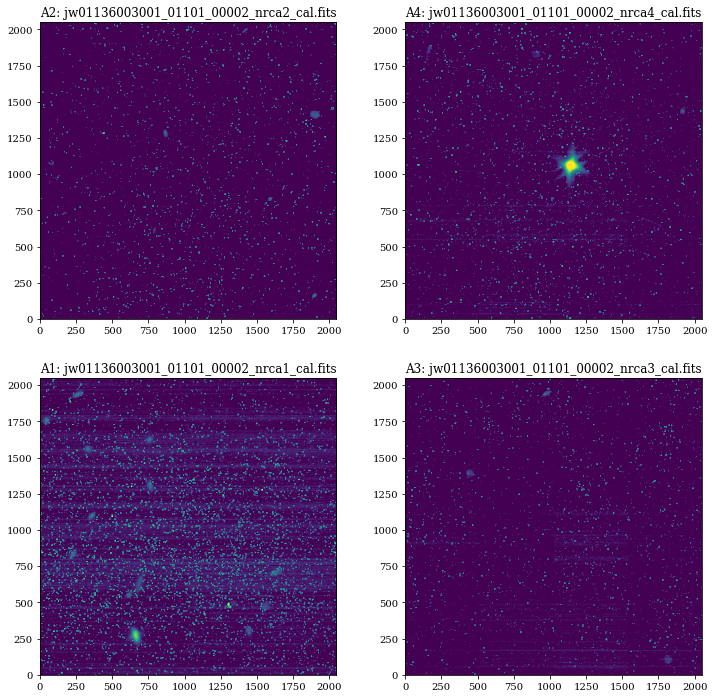

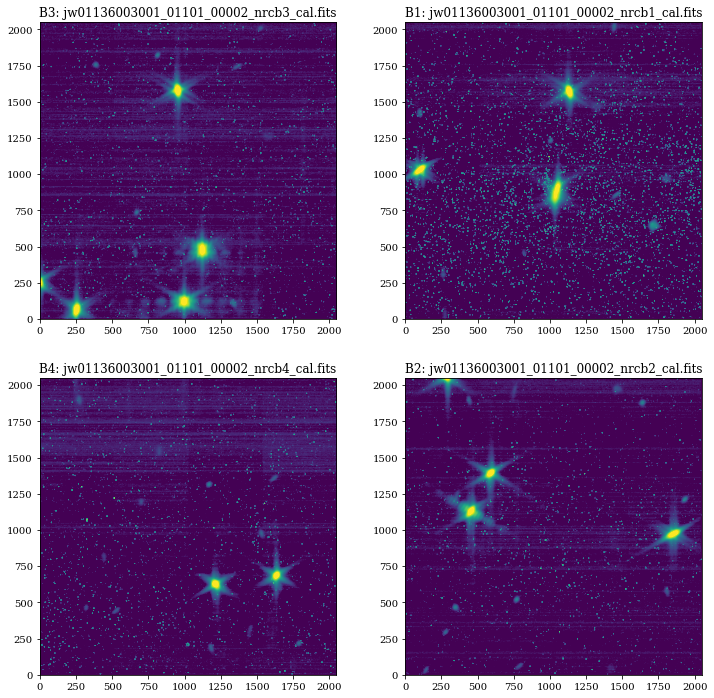

In [28]:
ote03_nrca_images, ote03_nrcb_images = notebook_utils.separate_nircam_images(ote03_best_focus_images)

nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)
notebook_utils.plot_nrca_images(nrca_data_list, nrca_name_list)

nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)
notebook_utils.plot_nrcb_images(nrcb_data_list, nrcb_name_list)

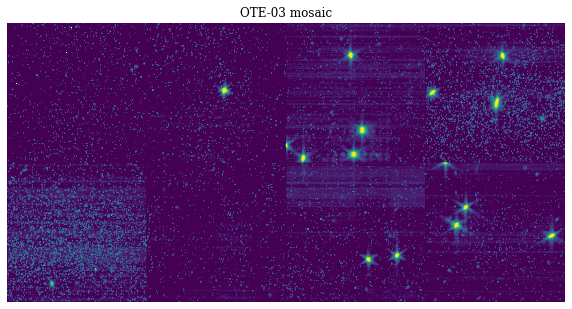

In [29]:
# Make our mosaic
ote03_image = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_image, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic')
plt.axis('off')
plt.show()

<font color='DodgerBlue'> <div><center>
## Run the following cells without changing them 
</center></div></font>

In [30]:
# We use the header for getting the pixel scale so it's okay that it is for only one of the images
ote03_header = fits.getheader(ote03_best_focus_images[0]) 

# Create a PsfAnalysis object for OTE-03, this is how we can do most of the analysis
ote03 = notebook_utils.PsfAnalysis(car, ote03_image, ote03_header, ote03_pixelscale, ote03_target_location)

In [31]:
# Measure the PSF locations and their characteristics for the OTE-03 image that we have
# Adjust the psf_window_radius if the window around the cut out PSFs below as needed
# This function will measure the FWHM_x, FWHM_y, the distance to the target location, 
#  and the encircled energy for each PSF
ote03.get_image_information(smoothing='high', psf_window_radius=100)

15 PSFs found


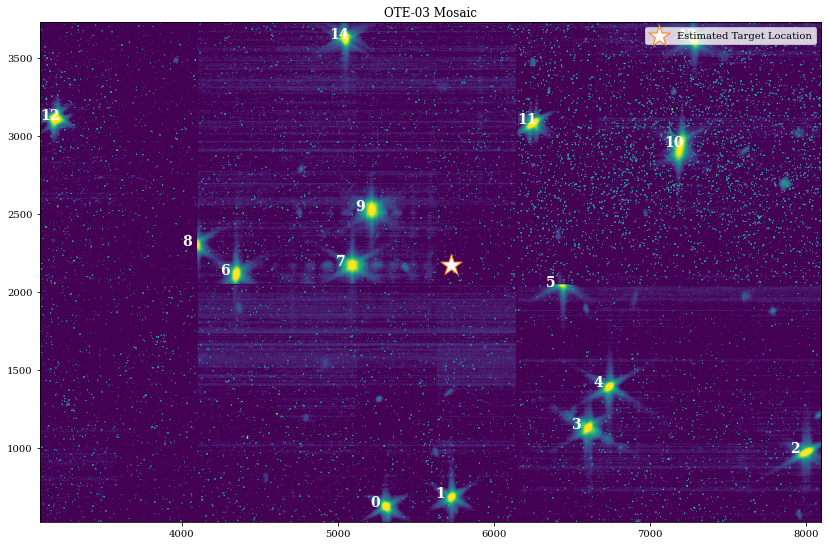

In [32]:
# Plot the full mosaic with the estimated target location and identified PSFs
ote03.plot_image_with_psfs(xlim=None, # If you need to change the x axis limits, do so here
                           ylim=None, # If you need to change the y axis limits, do so here
                           label_color='white') # If you can't read the PSF labels, change this parameter

<font color='SlateBlue'> <div>

### Things to look for:    
 
</div></font>


- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single bright spot in the PSF or are there multiple knots/lobes?


In [33]:
# Cut out each segment and do a visual check
ote03.plot_each_identified_segment_psf(num_psf_per_row=4,
                                       labels=None # Change this if you have segment knowledge
                                      )

Cannot plot anything without the PSFs list being populated.


IMPORTANT NOTE: Any PSFs that have saturated cores may not have reliable FWHM or EE measurements

In [34]:
# Let's look at the properties of each PSF. 
# The index on the left is the same as the numbering in the plots above
ote03.info_df

x     y     fwhm_x     fwhm_y  distance_to_target
0   5306   627  24.122002  26.379177         1599.140081
1   5726   687  18.989605  25.560589         1483.000000
2   7995   973  19.906436  50.895011         2565.379114
3   6599  1129  20.993041  38.934313         1358.605903
4   6735  1392  19.075400  30.154247         1274.113417
5   6436  2035  25.566310   8.206506          722.720555
6   4348  2113  21.771355  44.901749         1379.178379
7   5090  2170  37.898375  28.517385          636.000000
8   4107  2298  36.912633   8.961448         1624.052031
9   5215  2524  32.226130  56.568437          621.640571
10  7190  2935  89.347092  25.236260         1651.823538
11  6248  3077  49.871567  19.581307         1046.486025
12  3192  3107  43.570834  40.030478         2701.689286
13  7276  3617  44.472143  22.771254         2120.450188
14  5045  3625  24.185829  44.763947         1606.482493

In the table, the x, y location of each PSF has been found, it's associated FWHM_x and FWHM_y have been measured, as well as the distance to the estimated target location.

## Look at FWHM values and distance to the target

In the plots below, a circle is plotted for each located PSF in the mosiac image. The color of the circle is indicated by the value of the parameter indicated in the title. Green indicates a better value, red indicates a worse value, relative to the other data points. 

The distance to target can tell us how much the PSF might change once it is moved to its large image array location

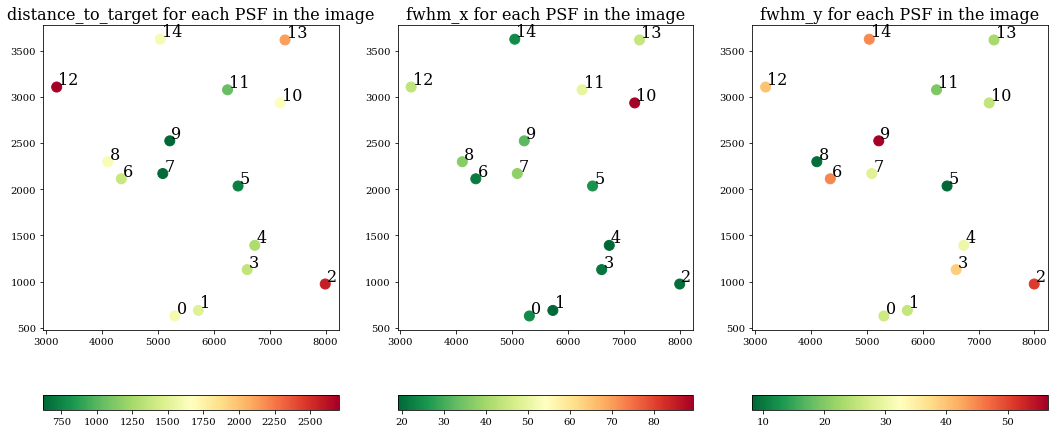

In [35]:
# Look at FWHM x and y (though the images should tell you the same information)
ote03.plot_multiple_parameters(['fwhm_x', 'fwhm_y', 'distance_to_target'])

### If EE has been measured, plot it!

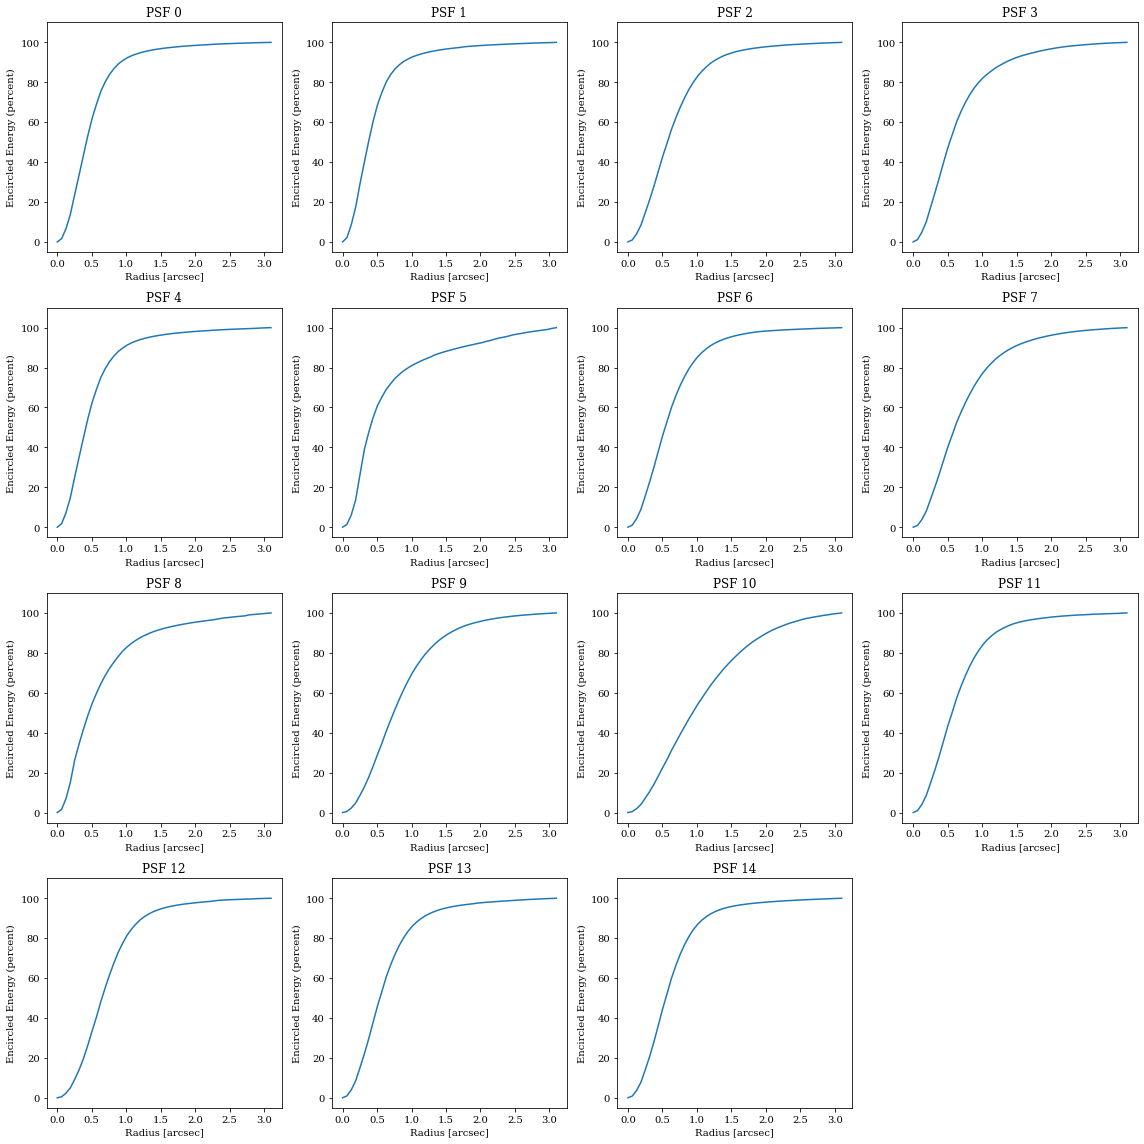

In [36]:
# We will only measure EE if pixel scale is not None
# All plots have the SAME y axis
ote03.plot_ee(num_psf_per_row=4, 
              labels=None) # Change this if you have segment knowledge     

### Based on the above information, how many segment PSFs are good enough to guide one?

<font color='Tomato'> <div><center>    
### Update the next cell (only) as needed   
</center></div></font>

In [37]:
# Give the number of PSFs that you think are good enough to guide on
good = 13 

If the number of "Good" PSFs is more than, or equal to 6, then we can feel confident that we can get a guiding scenario. If it is less than 6, then we will need OTE-03

In [38]:
if good < 6:
    print(f'We only have {good} PSFs that we think are good enough for guiding. We need more than 6.')
else:
    print(f'We have {good} PSFs that we think are good enough for guiding, which might be enough.')

We have 13 PSFs that we think are good enough for guiding, which might be enough.


# After OTE 04

**Ask Shadow which pointings will have all of the segments and only load those images.**

<font color='Tomato'> <div><center>  
## Make sure the following parameters are correct
</center></div></font>

In [105]:
# CAR information
car = 'OTE-04' # Make sure this form matches how it is written in the path to the data
program_id = 1137

In [106]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/' #/data/jwst/wss/guiding/Commissioning/ote04

# Pixelscale of the image, replace the None below if the mosaic has been rebinned by shadow
ote04_pixelscale = None # If set to None, the NIRCam SW pixelscale of 0.031"/pixel will be used

# Pointing 1
# Location of the NIRCam images
# Choose the last set of exposures for the first pointing
ote04_pointing1_images = glob(os.path.join(main_directory, 
                                           f'{car}/output/jw01137001001_01101_00019_nrc*_cal.fits'))

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote04_target_location1 = None


# Pointing 2
# Choose the last set of exposures for the first pointing
ote04_pointing2_images = glob(os.path.join(main_directory, 
                                           f'{car}/output/jw01137002001_01101_00004_nrc*_cal.fits'))

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote04_target_location2 = None

# Pointing 3
# Include more pointings as they exist.
# ote04_pointing3 = glob(os.path.join(main_directory, 
#                                     f'{car}/output/jw01137003001_01101_00004_nrc*_cal.fits'))


ote04_matching_dictionary = {}

<font color='DodgerBlue'> <div><center>  
## Run the following cells without changing them 
</center></div></font>

Now, we know which segment is which. After OTE-04 will be the first time that we will have a full large image array image to run through MAGIC and DHAS. 

In [107]:
# Plot out all all nircam images, and make our own mosiac

# -------------------     -------------------
# |        |        |     |        |        | 
# |   A2   |   A4   |     |   B3   |   B1   |
# |        |        |     |        |        |
# |        |        |     |        |        |
# -------------------     -------------------
# |        |        |     |        |        |
# |   A1   |   A3   |     |   B4   |   B2   |
# |        |        |     |        |        |
# |________|________|     |________|________| 

### Pointing 1 

In [108]:
ote04_pointing1_images

['/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrca1_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrcb4_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrca4_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrcb3_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrcb2_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrcb1_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrca3_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137001001_01101_00019_nrca2_cal.fits']

In [109]:
ote04_nrca_images1, ote04_nrcb_images1 = notebook_utils.separate_nircam_images(ote04_pointing1_images)

nrca_data_list1, nrca_name_list1 = notebook_utils.get_nrc_data_from_list(ote04_nrca_images1)
# If you want to plot out the NRCA images, uncomment the below line
# notebook_utils.plot_nrca_images(nrca_data_list1, nrca_name_list1)

nrcb_data_list1, nrcb_name_list1 = notebook_utils.get_nrc_data_from_list(ote04_nrcb_images1)
# If you want to plot out the NRCB images, uncomment the below line
# notebook_utils.plot_nrcb_images(nrcb_data_list1, nrcb_name_list1)

# Make our mosaic
ote04_image1 = notebook_utils.create_basic_mosaic(nrca_data_list1, nrcb_data_list1)

# If you want to see the mosaic before running the following cells, uncomment the 5 lines below
# plt.figure(figsize=(10,20))
# plt.imshow(ote04_image1, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
# plt.title(f'{car} mosaic')
# plt.axis('off')
# plt.show()

In [110]:
# We use the header for getting the pixel scale so it's okay that it is for only one of the images
ote04_header = fits.getheader(ote04_pointing1_images[0]) 

# Create a PsfAnalysis object for OTE-03, this is how we can do most of the analysis
ote04_pointing1 = notebook_utils.PsfAnalysis(car, ote04_image1, ote04_header, ote04_pixelscale, 
                                             ote04_target_location1)

# Measure the PSF locations and their characteristics for the OTE-03 image that we have
# Adjust the psf_window_radius if the window around the cut out PSFs below as needed
ote04_pointing1.get_image_information(smoothing='high', psf_window_radius=100)

15 PSFs found


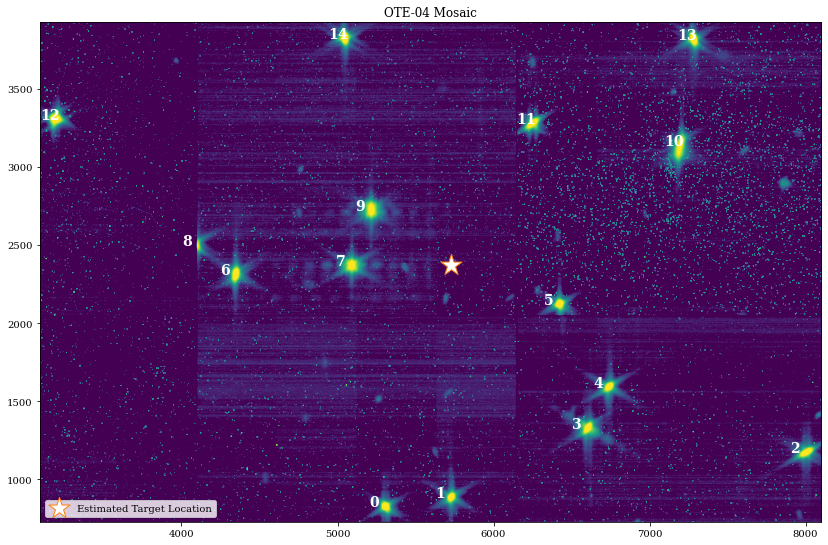

In [111]:
# Plot the full mosaic with the estimated target location and identified PSFs
ote04_pointing1.plot_image_with_psfs(xlim=None, # If you need to change the x axis limits, do so here
                                     ylim=None, # If you need to change the y axis limits, do so here
                                     label_color='white', # If you can't read the PSF labels, change this parameter
                                     legend_location='lower left' # 'best', 'upper left', 'upper right', 'lower left', 'lower right'
                                     )                   # 'upper center', 'lower center', 'center left', 'center right' 

In [112]:
# With the help of Shadow, determine the segment ID, if known, for each of the labelled PSFs in the above image 
# In the dictionary below, for each known PSF, record the associated number: segment ID. 

# Segment names: A1-1, A2-2, A3-3, A4-4, A5-5, A6-6, 
#                B1-7, B2-9, B3-11, B4-13, B5-15, B6-17, 
#                C1-8, C2-10, C3-13, C4-14, C5-16, C6-18

# Delete any entry where that segment is not present in the above image.
# Do not include partial segments unless this is the only image that they are in
# DO NOT include any repeats
ote04_matching_dictionary['pointing_1'] = {7  :'A1-1', 
                                            6  :'A3-3', 
                                            0  :'A4-4', 
                                            4  :'A5-5', 
                                            10 :'A6-6', 
                                            9  :'B1-7',
                                            13 :'B2-9', 
                                            14 :'B3-11', 
                                            1  :'B4-13', 
                                            2  :'B5-15', 
                                             3 :'C3-12', 
                                            11 :'C4-14', 
                                          }

### Pointing 2 

In [113]:
ote04_pointing2_images

['/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrca4_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrcb3_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrca2_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrcb4_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrcb1_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrca1_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrca3_cal.fits',
 '/ifs/jwst/tel/TeamPractices/OTE-04/output/jw01137002001_01101_00004_nrcb2_cal.fits']

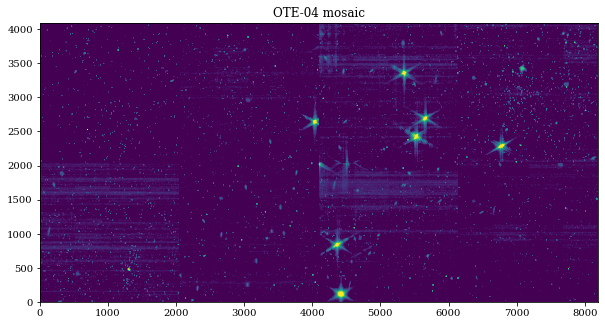

In [114]:
ote04_nrca_images2, ote04_nrcb_images2 = notebook_utils.separate_nircam_images(ote04_pointing2_images)

nrca_data_list2, nrca_name_list2 = notebook_utils.get_nrc_data_from_list(ote04_nrca_images2)
# If you want to plot out the NRCA images, uncomment the below line
# notebook_utils.plot_nrca_images(nrca_data_list2, nrca_name_list2)

nrcb_data_list2, nrcb_name_list2 = notebook_utils.get_nrc_data_from_list(ote04_nrcb_images2)
# If you want to plot out the NRCB images, uncomment the below line
# notebook_utils.plot_nrcb_images(nrcb_data_list2, nrcb_name_list2)

# Make our mosaic
ote04_image2 = notebook_utils.create_basic_mosaic(nrca_data_list2, nrcb_data_list2)

# If you want to see the mosaic before running the following cells, uncomment the 5 lines below
plt.figure(figsize=(10,20))
plt.imshow(ote04_image2, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic')
plt.show()

In [115]:
# We use the header for getting the pixel scale so it's okay that it is for only one of the images
ote04_header = fits.getheader(ote04_pointing2_images[0]) 

# Create a PsfAnalysis object for OTE-03, this is how we can do most of the analysis
ote04_pointing2 = notebook_utils.PsfAnalysis(car, ote04_image2, ote04_header, ote04_pixelscale, 
                                             ote04_target_location2)

# Measure the PSF locations and their characteristics for the OTE-03 image that we have
# Adjust the psf_window_radius if the window around the cut out PSFs below as needed
ote04_pointing2.get_image_information(smoothing='high', psf_window_radius=100)

7 PSFs found


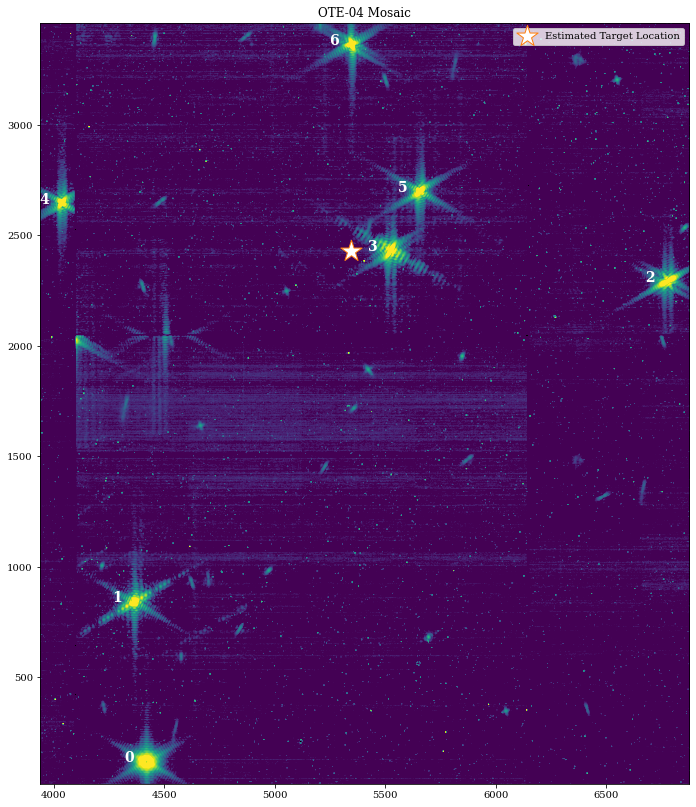

In [116]:
# Plot the full mosaic with the estimated target location and identified PSFs
ote04_pointing2.plot_image_with_psfs(xlim=None, # If you need to change the x axis limits, do so here
                                     ylim=None, # If you need to change the y axis limits, do so here
                                     label_color='white') # If you can't read the PSF labels, change this parameter

<font color='Tomato'> <div><center>    
## Make sure the following parameters are correct   
</center></div></font>

In [117]:
# With the help of Shadow, determine the segment ID, if known, for each of the labelled PSFs in the above image 
# In the dictionary below, for each known PSF, record the associated number: segment ID. 

# Segment names: A1-1, A2-2, A3-3, A4-4, A5-5, A6-6, 
#                B1-7, B2-9, B3-11, B4-13, B5-15, B6-17, 
#                C1-8, C2-10, C3-13, C4-14, C5-16, C6-18

# Delete any entry where that segment is not present in the above image.
# Do not include partial segments unless this is the only image that they are in
# DO NOT include any repeats
ote04_matching_dictionary['pointing_2'] ={5   :'A2-2', 
                                          0   :'B6-17', 
                                          1   :'C1-8', 
                                          3   :'C2-10', 
                                          4   :'C5-16', 
                                          2   :'C6-18'
                                          }

### Combine the different pointings so that we can use all the data together

In [118]:
ote04_combined = notebook_utils.PsfAnalysis(car, None, ote04_header, ote04_pixelscale, 
                                            None)

In [119]:
info_dfs = [ote04_pointing1.info_df, ote04_pointing2.info_df]
ee_fn_lists = [ote04_pointing1.ee_fns, ote04_pointing2.ee_fns]
ote04_combined.info_df, ote04_combined.ee_fns = notebook_utils.create_combined_pointing_df(info_dfs, 
                                                                                           ote04_matching_dictionary,
                                                                                           ee_fn_lists)

ote04_combined.info_df

segment    pointing     x     y        fwhm_x        fwhm_y  \
7     A1-1  pointing_1  5089  2371  2.830001e+01  3.888252e+01   
6     A3-3  pointing_1  4346  2314  4.664341e+01  2.156263e+01   
0     A4-4  pointing_1  5305   826  2.488807e+01  2.816397e+01   
4     A5-5  pointing_1  6737  1593  1.877076e+01  3.026923e+01   
10    A6-6  pointing_1  7191  3139  2.457095e+01  9.088087e+01   
9     B1-7  pointing_1  5214  2725  5.829416e+01  3.096587e+01   
13    B2-9  pointing_1  7277  3820  2.303534e+01  4.555522e+01   
14   B3-11  pointing_1  5043  3828  4.674080e+01  2.503537e+01   
1    B4-13  pointing_1  5726   886  1.953543e+01  2.636447e+01   
2    B5-15  pointing_1  7999  1173  1.951689e+01  5.118376e+01   
3    C3-12  pointing_1  6601  1329  3.968292e+01  2.101438e+01   
11   C4-14  pointing_1  6248  3280  1.989758e+01  5.163773e+01   
5     A2-2  pointing_2  5655  2697  2.047585e+01  1.037735e+01   
0    B6-17  pointing_2  4419   117  2.768078e-38  2.768078e-38   
1     C1-8  pointing_2  4362   840  9.792125e+00  1.222368e+01   
3    C2-10  pointing_2  5522  2430  9.422970e+00  3.537494e+01   
4    C5-16  pointing_2  4036  2645  1.367889e+01  1.500328e+01   
2    C6-18  pointing_2  6775  2291  1.026331e+01  4.622870e+01   

    distance_to_target  
7           637.000000  
6          1381.176672  
0          1601.332570  
4          1275.697848  
10         1654.100662  
9           622.462850  
13         2122.546113  
14         1609.142007  
1          1485.000000  
2          2569.383778  
3          1360.657562  
11         1048.219920  
5           409.132008  
0          2491.474463  
1          1869.328489  
3           177.000000  
4          1326.539106  
2          1436.739712

In [120]:
# Put the images in order of the pointings
pointings_images = [ote04_pointing1.corrected_image, ote04_pointing2.corrected_image]
psf_window_radius = 100
ote04_combined.psfs = notebook_utils.get_psfs_from_all_pointings(ote04_combined.info_df, pointings_images, psf_window_radius)
ote04_combined.psf_window_radius = psf_window_radius

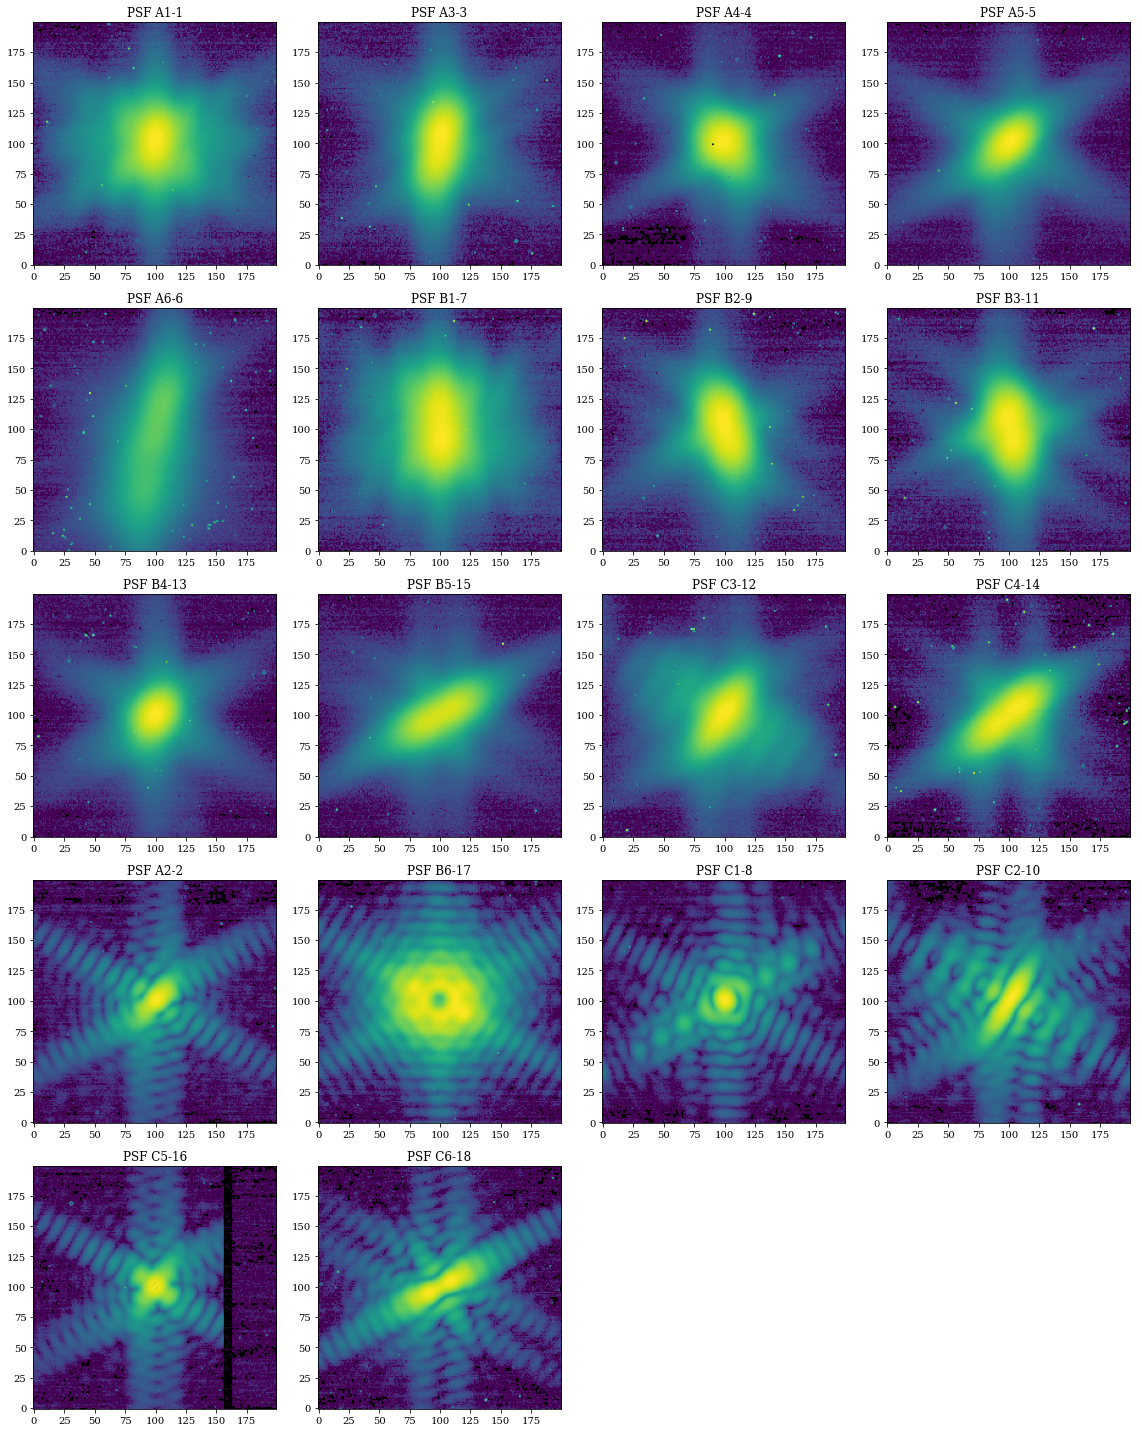

In [121]:
# Cut out each segment and do a visual check
# Change the size of the postage stamp cut out, by adjusting the window_size value which is the size of one side
ote04_combined.plot_each_identified_segment_psf(num_psf_per_row=4,
                                                labels=ote04_combined.info_df['segment'].values)

### Place the segments at their Large Image Array configuration

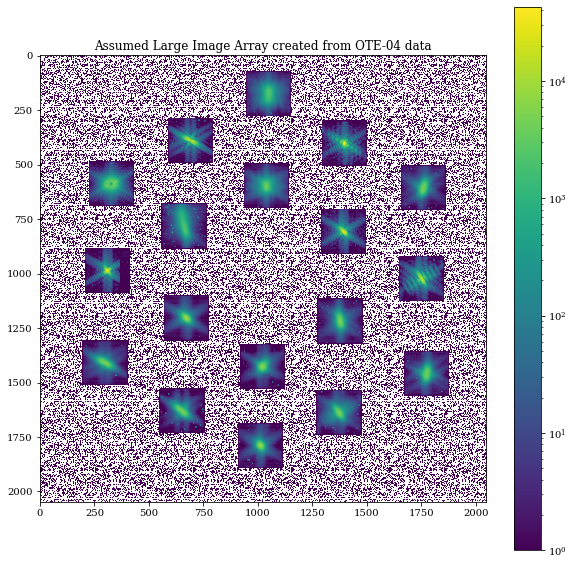

In [122]:
# Put known segment postage stamps in large image array locations
ote04_large_image_array, ga_xs, ga_ys = notebook_utils.create_image_array(ote04_combined.psfs,
                                                                          ote04_combined.info_df['segment'].values,
                                                                          ote04_combined.psf_window_radius)

# Plot out new image with distance color coded by how far from boresight
plt.figure(figsize=(10, 10))
plt.imshow(ote04_large_image_array, norm=LogNorm(vmin=1), origin='upper')
plt.title(f"Assumed Large Image Array created from {car} data")
plt.colorbar()
plt.show()

In [123]:
# Save this out to an image that we can run through MAGIC
out_dir = os.path.join(main_directory, f'{car}') # Make sure this is where you want to save it
filename = f'pseudo_large_image_array_from_{car}.fits'
notebook_utils.save_out_image_for_magic(ote04_large_image_array, ote04_header, filename, out_dir)

### Plot heat map of distances from estimated target location 

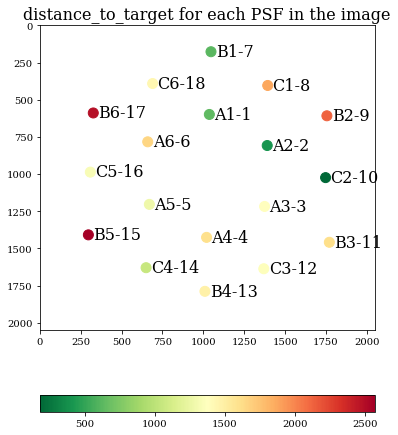

In [124]:
# Look at high level numbers
ote04_combined.plot_multiple_parameters(['distance_to_target'], xs=ga_xs, ys=ga_ys,
                                        xlim=(0,2048), ylim=(2048, 0))

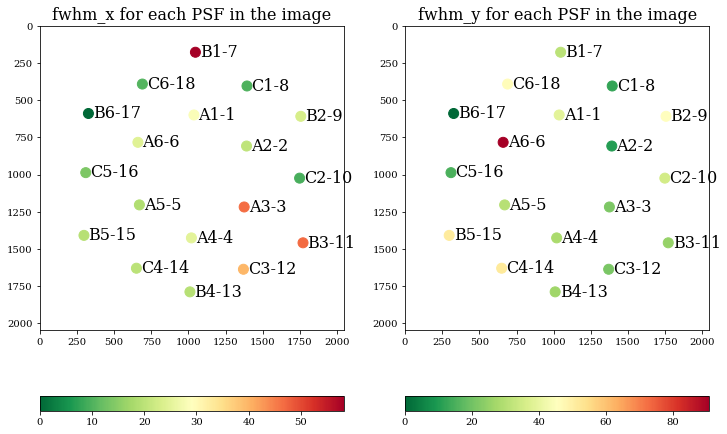

In [125]:
# Break down the FWHM further
ote04_combined.plot_multiple_parameters(['fwhm_x', 'fwhm_y'], xs=ga_xs, ys=ga_ys,
                                        xlim=(0, 2048), ylim=(2048, 0))

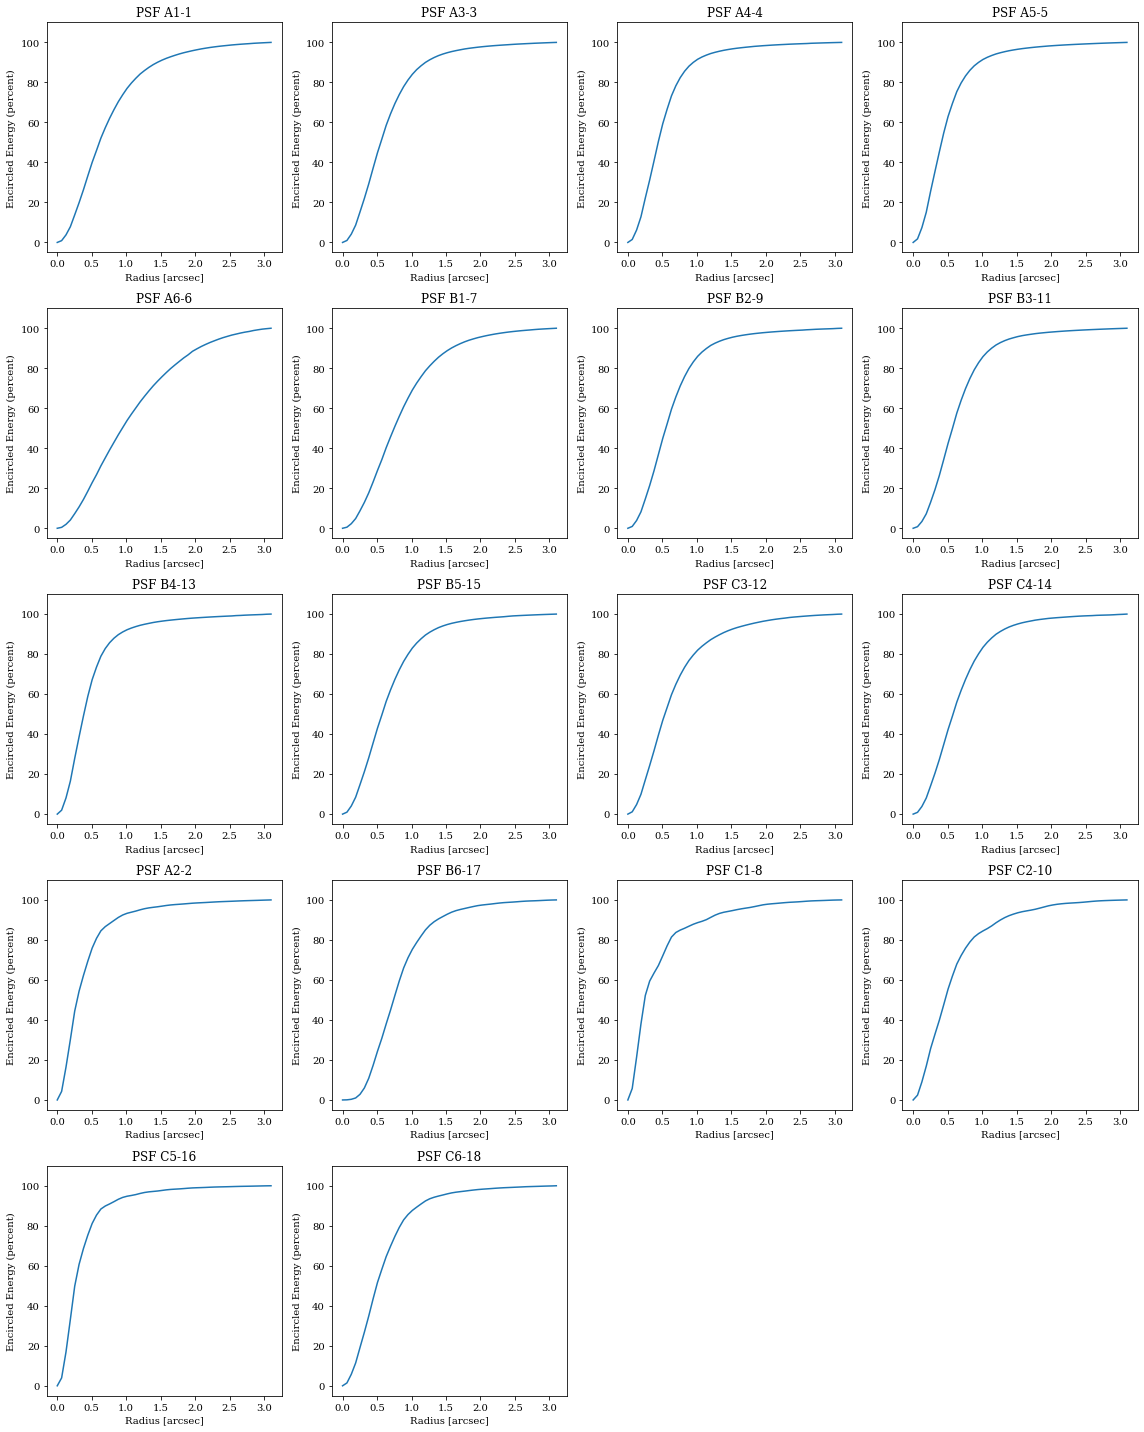

In [126]:
# We will only measure EE if pixel scale is not None
# All plots have the SAME y axis
ote04_combined.plot_ee(num_psf_per_row=4, 
                       labels=ote04_combined.info_df['segment'].values)    

You can now run this file through MAGIC and see if you can find some selections that can be used for LOS-02

# After OTE 06

*Do a quick run with the same analysis that you did after OTE-01, OTE-02, OTE-03, OTE-04.*

Then you will run this image through MAGIC and start the normal guiding process

<font color='Tomato'> <div><center>  
## Make sure the following parameters are correct
</center></div></font>

In [73]:
# CAR information
car = 'OTE-06' # Make sure this form matches how it is written in the path to the data
program_id = 1140

In [77]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/' #/data/jwst/wss/guiding/Commissioning/ote-06

# Location of the final image from OTE-06
ote06_file = os.path.join(main_directory, f'{car}/output/jw01140003001_01101_00019_nrca3_cal.fits')

# Pixelscale of the image, replace the None below if the mosaic has been rebinned by shadow
ote06_pixelscale = None # If set to None, the NIRCam SW pixelscale of 0.031"/pixel will be used

<font color='DodgerBlue'> <div><center>
## Run the following cells without changing them 
</center></div></font>

In [78]:
# We use the header for getting the pixel scale
ote06_image, ote06_header = fits.getdata(ote06_file, header=True)

# Create a PsfAnalysis object for OTE-02, this is how we can do most of the analysis
ote06 = notebook_utils.PsfAnalysis(car, ote06_image, ote06_header, ote06_pixelscale)

In [79]:
# Measure the PSF locations and their characteristics for the OTE-03 image that we have
# Adjust the psf_window_radius if the window around the cut out PSFs below as needed
ote06.get_image_information(smoothing='high', psf_window_radius=40)

18 PSFs found


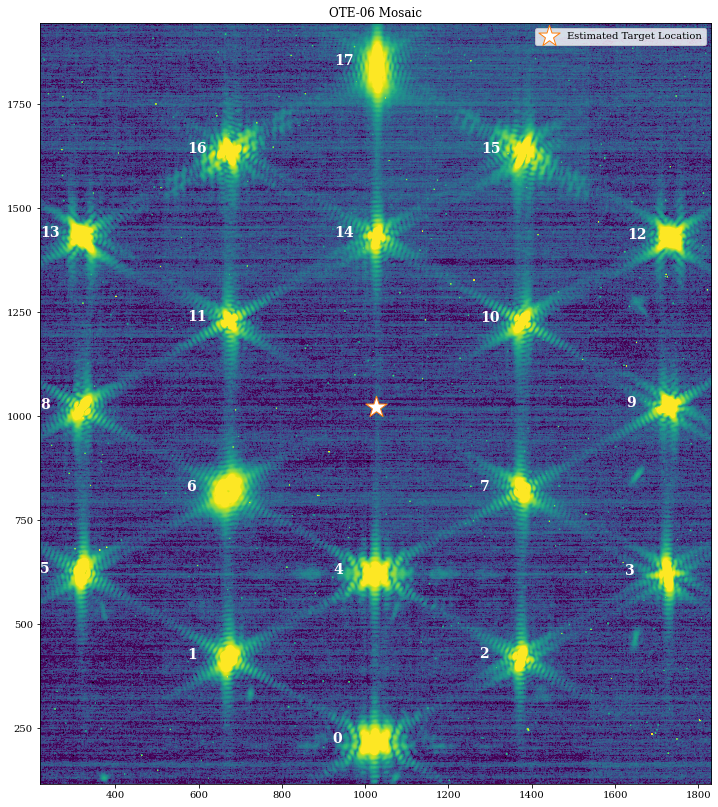

In [80]:
# Plot the full mosaic with the estimated target location and identified PSFs
ote06.plot_image_with_psfs(xlim=None, # If you need to change the x axis limits, do so here
                           ylim=None, # If you need to change the y axis limits, do so here
                           label_color='white') # If you can't read the PSF labels, change this parameter

<font color='SlateBlue'> <div>

### Things to look for:    
 
</div></font>


- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single bright spot in the PSF or are there multiple knots/lobes?


In [81]:
# Cut out each segment and do a visual check
ote06.plot_each_identified_segment_psf(num_psf_per_row=4,
                                       labels=None) # Change this if you have segment knowledge

Cannot plot anything without the PSFs list being populated.


IMPORTANT NOTE: Any PSFs that have saturated cores may not have reliable FWHM or EE measurements

In [82]:
# Let's look at the properties of each PSF. 
# The index on the left is the same as the numbering in the plots above
ote06.info_df

x     y        fwhm_x        fwhm_y  distance_to_target
0   1022   217  3.746037e+01  4.570822e+01          804.005597
1    672   418  1.357110e+01  3.124694e+01          698.725983
2   1373   419  1.001434e+01  2.517785e+01          695.347395
3   1723   620  1.041964e+01  4.039713e+01          804.987578
4   1023   621  1.366833e+01  2.738202e+01          400.005000
5    320   625  3.668687e+01  1.119260e+01          808.604353
6    671   822  2.768078e-38  2.768078e-38          406.099741
7   1375   822  1.039756e+01  2.651632e+01          402.617685
8    321  1019  3.170471e+01  1.007052e+01          704.002841
9   1726  1023  2.332083e+01  2.003066e+01          701.002853
10  1376  1227  2.069145e+01  1.030984e+01          406.985258
11   673  1228  1.273624e+01  1.203216e+01          408.354013
12  1730  1427  3.653710e+01  3.018432e+01          813.548401
13   319  1430  4.034592e+01  2.196183e+01          815.914824
14  1027  1430  2.057114e+01  1.100423e+01          409.004890
15  1378  1632  9.819654e+00  4.314743e+01          705.641552
16   673  1633  1.250773e+01  3.581048e+01          706.008499
17  1027  1844  2.269320e+01  7.867141e+01          823.002430

In the table, the x, y location of each PSF has been found, it's associated FWHM_x and FWHM_y have been measured, as well as the distance to the estimated target location.

## Look at FWHM values and distance to the target

In the plots below, a circle is plotted for each located PSF in the mosiac image. The color of the circle is indicated by the value of the parameter indicated in the title. Green indicates a better value, red indicates a worse value, relative to the other data points. 

The distance to target can tell us how much the PSF might change once it is moved to its large image array location

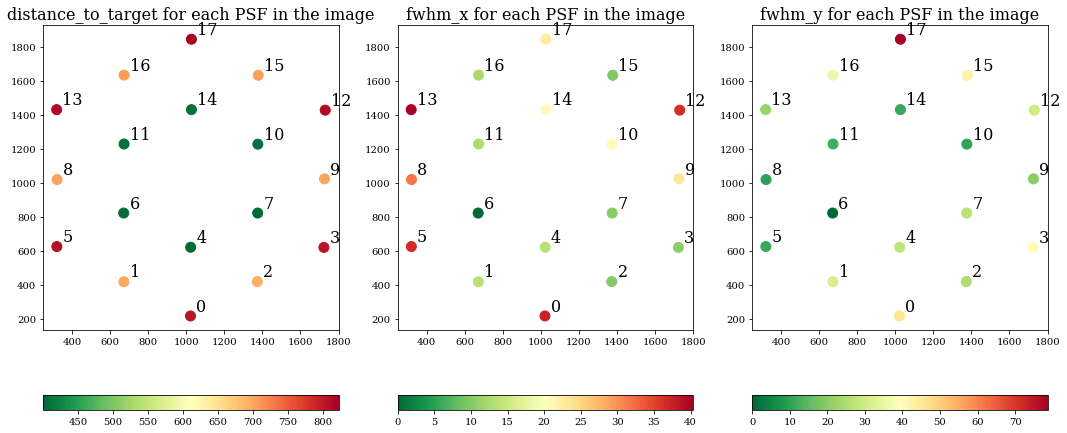

In [83]:
# Look at FWHM x and y (though the images should tell you the same information)
ote06.plot_multiple_parameters(['fwhm_x', 'fwhm_y', 'distance_to_target'])

### If EE has been measured, plot it!

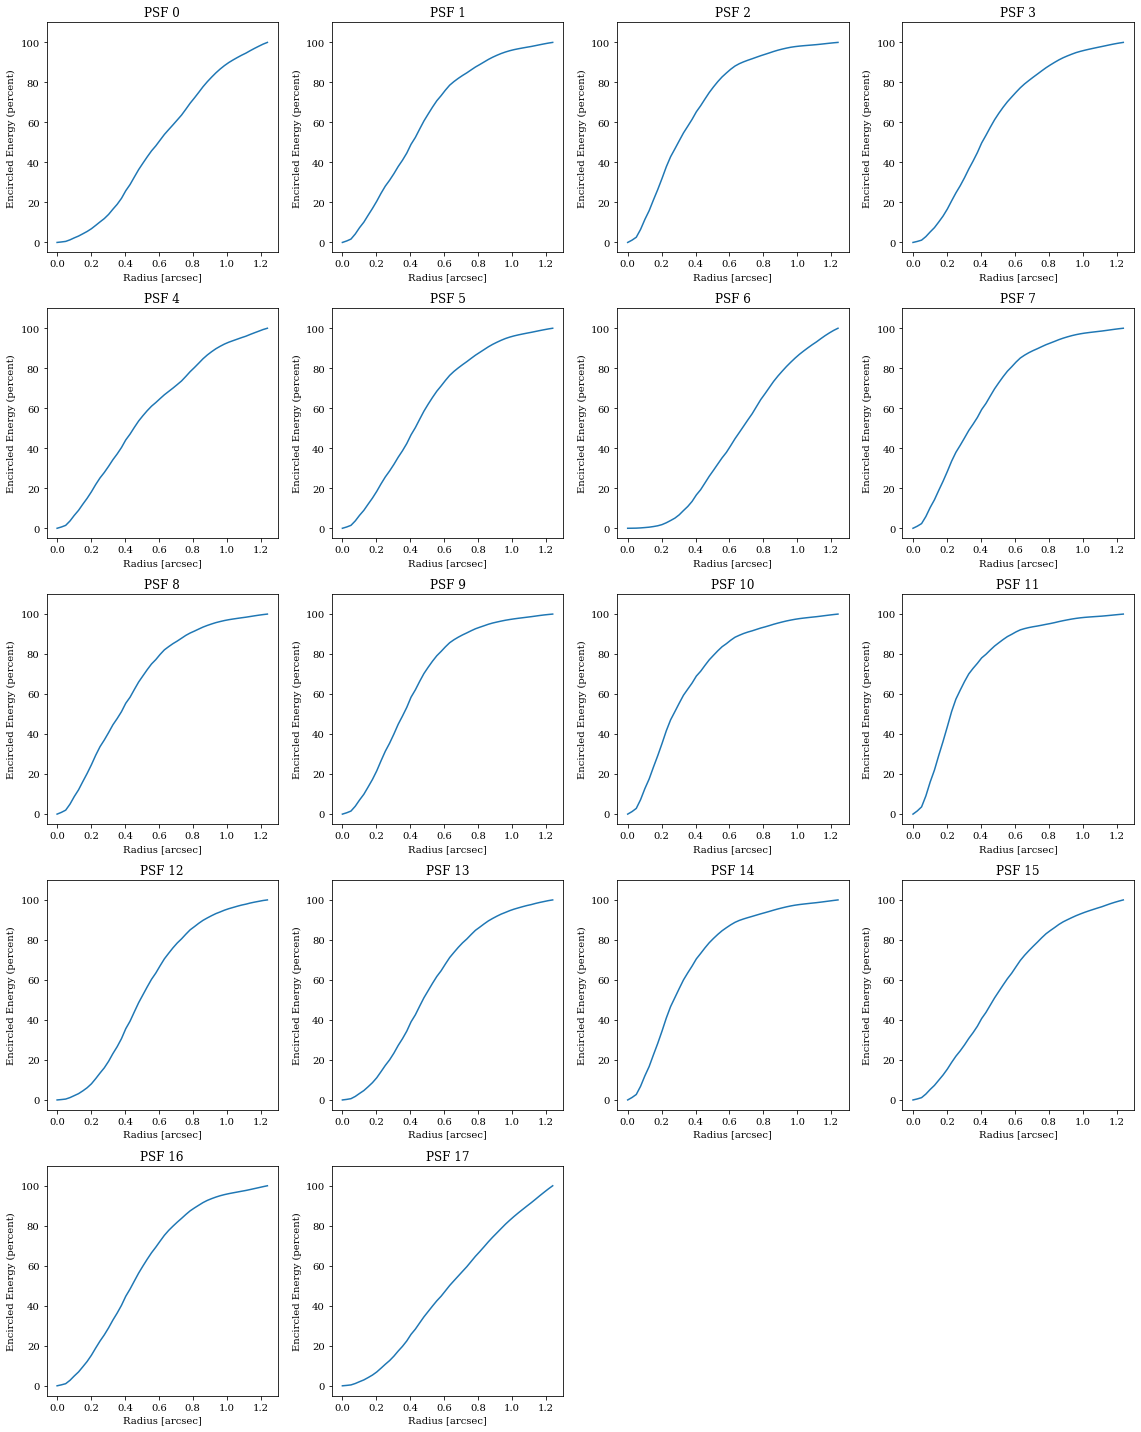

In [84]:
# We will only measure EE if pixel scale is not None
# All plots have the SAME y axis
ote06.plot_ee(num_psf_per_row=4, 
              labels=None) # Change this if you have segment knowledge     

# Look at different focus positions in OTE-03 data

This section is set up so that you can visually inspect the OTE-03 images as the secondary mirror moves through the different focus positions.

In [85]:
# CAR information
car = 'OTE-03'  # Make sure this form matches how it is written in the path to the data
program_id = 1136

In [86]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/'

# Location of the NIRCam images at the best focus
ote03_best_focus_images = glob(os.path.join(main_directory, 
                                            f'{car}/output/jw01136003001_01101_00002_nrc*_cal.fits'))


# Location of the file exported from QUIP
# If no file is provided, set variable equal to None
ote03_info_from_shadow = None

# Define location of the target in the image
# If no location is provided, set variable equal to None
ote03_target_location = None

In [102]:
# Only grab shortwave detector images
ote03_focus1_images = glob(os.path.join(main_directory, 
                                        f'{car}/output/jw01136001001_01101_00001_nrc*[1-4]_cal.fits'))

ote03_focus2_images = glob(os.path.join(main_directory, 
                                        f'{car}/output/jw01136001001_01101_00002_nrc*[1-4]_cal.fits'))

ote03_focus3_images = glob(os.path.join(main_directory, 
                                        f'{car}/output/jw01136001001_01101_00003_nrc*[1-4]_cal.fits'))

ote03_focus4_images = glob(os.path.join(main_directory, 
                                        f'{car}/output/jw01136001001_01101_00004_nrc*[1-4]_cal.fits'))

ote03_focus5_images = glob(os.path.join(main_directory, 
                                        f'{car}/output/jw01136001001_01101_00005_nrc*[1-4]_cal.fits'))
# Should be the same as 1
ote03_focus6_images = glob(os.path.join(main_directory, 
                                        f'{car}/output/jw01136001001_01101_00005_nrc*[1-4]_cal.fits'))



<font color='DodgerBlue'> <div><center>  
## Run the following cells without changing them 
</center></div></font>

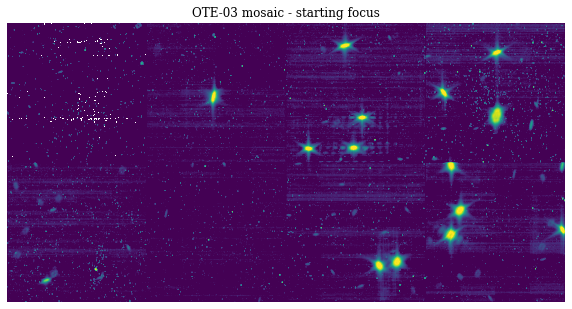

In [104]:
ote03_nrca_images, ote03_nrcb_images = notebook_utils.separate_nircam_images(ote03_focus1_images)
# Separate out the data
nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)
nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)

# Make our mosaic
ote03_focus1 = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_focus1, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic - starting focus')
plt.axis('off')
plt.show()

In [ ]:
ote03_nrca_images, ote03_nrcb_images = notebook_utils.separate_nircam_images(ote03_focus2_images)
# Separate out the data
nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)
nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)

# Make our mosaic
ote03_focus2 = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_focus2, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic - 1st focus position')
plt.axis('off')
plt.show()

In [ ]:
ote03_nrca_images, ote03_nrcb_images = notebook_utils.separate_nircam_images(ote03_focus3_images)
# Separate out the data
nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)
nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)

# Make our mosaic
ote03_focus3 = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_focus3, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic - 2nd focus position')
plt.axis('off')
plt.show()

In [ ]:
ote03_nrca_images, ote03_nrcb_images = notebook_utils.separate_nircam_images(ote03_focus4_images)
# Separate out the data
nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)
nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)

# Make our mosaic
ote03_focus4 = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_focus4, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic - 3nd focus position')
plt.axis('off')
plt.show()

In [ ]:
ote03_nrca_images, ote03_nrcb_images = notebook_utils.separate_nircam_images(ote03_focus5_images)
# Separate out the data
nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)
nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)

# Make our mosaic
ote03_focus5 = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_focus5, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic - 4th focus position')
plt.axis('off')
plt.show()

In [ ]:
ote03_nrca_images, ote03_nrcb_images = notebook_utils.separate_nircam_images(ote03_focus6_images)
# Separate out the data
nrca_data_list, nrca_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrca_images)
nrcb_data_list, nrcb_name_list = notebook_utils.get_nrc_data_from_list(ote03_nrcb_images)

# Make our mosaic
ote03_focus6 = notebook_utils.create_basic_mosaic(nrca_data_list, nrcb_data_list)

plt.figure(figsize=(10,20))
plt.imshow(ote03_focus6, norm=LogNorm(vmin=1, vmax=1000), origin='lower')
plt.title(f'{car} mosaic - 5th focus position')
plt.axis('off')
plt.show()

# Get simulated NIRCam locations of LOS-02 PSFs 

This section walks through getting the locations of each of the segment PSFs in the large image array configuration. This section is only to support the operations in OTE-04 above and should not need to be run. 

In [ ]:
los02_image = fits.getdata('/ifs/jwst/tel/LRE5/LOS-02/output/LRE5-RfR/jw01410002001_02101_00001_nrca3_cal.fits')

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(los02_image, norm=LogNorm(vmin=1))
plt.title()

In [ ]:
# Do not change this cell
# mapping of magic segment labels to WSS numbers

SEGMENT_MAP_SCI = ["B1-7",  "C6-18", "C1-8",  "B6-17",
                   "A1-1",  "B2-9",  "A6-6",  "A2-2", 
                   "C5-16", "C2-10", "A5-5",  "A3-3", 
                   "B5-15", "A4-4",  "B3-11", "C4-14", 
                   "C3-12", "B4-13"]

In [ ]:
x_list, y_list = notebook_utils.get_position_from_magic(los02_image, 
                                                        smoothing='high', 
                                                        npeaks=np.inf)

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(los02_image, norm=LogNorm(vmin=1))
for i, (seg, x, y) in enumerate(zip(SEGMENT_MAP_SCI, x_list, y_list)):
    plt.annotate(i, (x, y), (x+15, y+15), color='white' )
    plt.annotate(seg, (x, y), (x-30, y-30), color='white' )

In [ ]:
all_psfs_table = pd.DataFrame({'segment':SEGMENT_MAP_SCI, 'x':x_list, 'y':y_list, })

all_psfs_table

In [ ]:
truth_locations = all_psfs_table.set_index('segment').T.to_dict('list')
truth_locations

In [ ]:
truth_locations == notebook_utils.GA_PSF_LOCATIONS